# HM 878 Applied Biostatistics Problem Set #1c

## Binary Logistic Regression and Cox Proportional Hazards Regression

*This Problem Set will provide students with the opportunity to learn
how to use R to conduct basic statistical tests, replicating many tests
that were already done in HM 802. The main goal is to make sure you are
familiar with R as a system for statistical analysis.*

Analyses include:

-	Binary logistic regression
-	Cox Proportional Hazards Regression


------------------------------------------------------------------------

*Setting up the code environment*

In [12]:
library(dplyr)
library(tidyverse)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.1.8
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


------------------------------------------------------------------------

## Question 1

Data: Logistic Regression Data.csv. Variables: Dependent variable: BMI_Categories.  Independent variables: HLTHPLN1, RFSMOK3, VEGESU1, and SEX.  Variables are coded as follows:
•	BMI_Categories (BMI): 0 = Under/Normal Weight, 1 = Overweight/Obese
•	HLTHPLN1 (Has Health care coverage): 0 = No, 1 = Yes
•	RFSMOK3 (Current Smoker): 0 = No, 1 = Yes
•	VEGESU1 (Servings of vegetables per day): continuous, numerical data
•	SEX (Sex): 0 = Female, 1 = Male

In [2]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\Logistic  Regression Data.csv")

In [3]:
colnames(df)

[1] "BMI_Categories" "SEX"            "VEGESU1"        "RFSMOK3"       
[5] "HLTHPLN1"

In [4]:
head(df)

,BMI_Categories,SEX,VEGESU1,RFSMOK3,HLTHPLN1
,<int>,<int>,<dbl>,<int>,<int>
1,0,0,3.00,0,1
2,1,1,1.17,1,1
3,0,1,3.29,0,1
4,1,1,2.58,0,1
5,1,0,2.29,0,1
6,0,0,1.50,0,1


In [5]:
df$SEX[df$SEX == 9] <- NA
df$RFSMOK3[df$RFSMOK3 == 9] <- NA
df$HLTHPLN1[df$HLTHPLN1 == 7] <- NA
df$HLTHPLN1[df$HLTHPLN1 == 9] <- NA


In [6]:
model <- glm(BMI_Categories ~ SEX + VEGESU1 + RFSMOK3 + HLTHPLN1, family = binomial, data=df)

In [7]:
summary(model)


Call:
glm(formula = BMI_Categories ~ SEX + VEGESU1 + RFSMOK3 + HLTHPLN1, 
    family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6728  -1.4246   0.7606   0.9421   1.5062  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.596689   0.082172   7.261 3.83e-13 ***
SEX          0.516664   0.041701  12.390  < 2e-16 ***
VEGESU1     -0.012233   0.007518  -1.627    0.104    
RFSMOK3     -0.324687   0.055745  -5.825 5.73e-09 ***
HLTHPLN1     0.002817   0.079792   0.035    0.972    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13938  on 11101  degrees of freedom
Residual deviance: 13750  on 11097  degrees of freedom
  (2273 observations deleted due to missingness)
AIC: 13760

Number of Fisher Scoring iterations: 4


In [27]:
int_model <- glm(BMI_Categories ~ 1, family = binomial, data=df)

In [29]:
data.frame(exp(coef(int_model)))


,exp.coef.int_model..
,<dbl>
(Intercept),2.084237


In [32]:
data.frame(exp(confint(int_model)))

Waiting for profiling to be done...



,exp.confint.int_model..
,<dbl>
2.5 %,2.006961
97.5 %,2.164852


In [21]:
cbind(data.frame(exp(coef(model))), data.frame(exp(confint(model))))

Waiting for profiling to be done...



,exp.coef.model..,X2.5..,X97.5..
,<dbl>,<dbl>,<dbl>
(Intercept),1.8160957,1.5475785,2.1360013
SEX,1.6764266,1.5450610,1.8194530
VEGESU1,0.9878410,0.9730151,1.0026220
RFSMOK3,0.7227536,0.6481260,0.8064431
HLTHPLN1,1.0028209,0.8565683,1.1712653


------------------------------------------------------------------------

## Question 2

Run a Cox Regression. Data: Cox Proportional Hazard Regression Data. Variables: Use TimeDeathYears as the “Time” variable. Death is the Status or Event variable.  Use cursmoke, diabetes, educ, prevchd, age, bmi, and sex as the covariates. For the categorical variables, make sure that not a current smoker, no diabetes, the lowest education category, no CHD, and female sex are all reference categories.  Generate 95% CIs for each hazard ratio. Generate a Kaplan Meijer plot.

In [1]:
library(survival)
library(dplyr)
# library(tidyverse)
library(fastDummies)

Warning message:
"package 'survival' was built under R version 4.2.3"



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'fastDummies' was built under R version 4.2.3"
Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



In [10]:
df <- read.csv("C:\\Users\\ljens\\Downloads\\Cox Prop Hazard Regression Data.csv")

In [11]:
colnames(df)

[1] "randid"         "TimeDeathYears" "death"          "cursmoke"      
 [5] "diabetes"       "educ"           "prevchd"        "age"           
 [9] "bmi"            "sex"

In [12]:
head(df)

,randid,TimeDeathYears,death,cursmoke,diabetes,educ,prevchd,age,bmi,sex
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,2448,15,0,0,0,4,0,52,NA,1
2,6238,15,0,0,0,2,0,58,28.50,0
3,11252,15,0,1,0,3,0,58,24.61,0
4,11263,15,0,0,1,2,0,55,31.17,0
5,12806,15,0,1,0,2,0,57,22.02,0
6,14367,15,0,0,0,1,0,64,25.72,1


In [13]:
summary(df)

     randid        TimeDeathYears      death           cursmoke     
 Min.   :   2448   Min.   : 2.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:2509944   1st Qu.:15.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :5050572   Median :15.00   Median :0.0000   Median :0.0000  
 Mean   :5028933   Mean   :13.57   Mean   :0.2375   Mean   :0.3435  
 3rd Qu.:7501310   3rd Qu.:15.00   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :9999312   Max.   :15.00   Max.   :1.0000   Max.   :1.0000  
                                                                    
    diabetes            educ          prevchd            age       
 Min.   :0.00000   Min.   :1.000   Min.   :0.0000   Min.   :44.00  
 1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:54.00  
 Median :0.00000   Median :2.000   Median :0.0000   Median :60.00  
 Mean   :0.07784   Mean   :2.014   Mean   :0.1103   Mean   :60.65  
 3rd Qu.:0.00000   3rd Qu.:3.000   3rd Qu.:0.0000   3rd Qu.:67.00  
 Max.   :1.00000   Max.   :4.000   Max. 

In [14]:
df <- cbind(df, dummy_cols(df$educ, remove_first_dummy = TRUE))

In [15]:
colnames(df)

[1] "randid"         "TimeDeathYears" "death"          "cursmoke"      
 [5] "diabetes"       "educ"           "prevchd"        "age"           
 [9] "bmi"            "sex"            ".data"          ".data_2"       
[13] ".data_3"        ".data_4"        ".data_NA"

In [16]:
df <- rename(df, 
        #"0-11 years"= '.data_1', 
        "HS or GED" = '.data_2', 
        "Some Coll" = '.data_3', 
        "Coll Grad" = '.data_4'
            )

In [31]:
colnames(df)

[1] "randid"         "TimeDeathYears" "death"          "cursmoke"      
 [5] "diabetes"       "educ"           "prevchd"        "age"           
 [9] "bmi"            "sex"            ".data"          "HS or GED"     
[13] "Some Coll"      "Coll Grad"      ".data_NA"

In [17]:
df <- subset(df, select = -c(.data,.data_NA))

In [18]:
head(df)

,randid,TimeDeathYears,death,cursmoke,diabetes,educ,prevchd,age,bmi,sex,HS or GED,Some Coll,Coll Grad
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,2448,15,0,0,0,4,0,52,NA,1,0,0,1
2,6238,15,0,0,0,2,0,58,28.50,0,1,0,0
3,11252,15,0,1,0,3,0,58,24.61,0,0,1,0
4,11263,15,0,0,1,2,0,55,31.17,0,1,0,0
5,12806,15,0,1,0,2,0,57,22.02,0,1,0,0
6,14367,15,0,0,0,1,0,64,25.72,1,0,0,0


In [19]:
colnames(df)

[1] "randid"         "TimeDeathYears" "death"          "cursmoke"      
 [5] "diabetes"       "educ"           "prevchd"        "age"           
 [9] "bmi"            "sex"            "HS or GED"      "Some Coll"     
[13] "Coll Grad"

In [20]:
model = coxph(Surv(df$'TimeDeathYears',df$'death') ~ 
df$'cursmoke' + df$'diabetes' + df$'prevchd' + df$'age' + df$'bmi' + df$'sex' + 
#df$'0-11 years' + 
df$'HS or GED' + df$'Some Coll' + df$'Coll Grad')

In [21]:
summary(model)

Call:
coxph(formula = Surv(df$TimeDeathYears, df$death) ~ df$cursmoke + 
    df$diabetes + df$prevchd + df$age + df$bmi + df$sex + df$"HS or GED" + 
    df$"Some Coll" + df$"Coll Grad")

  n= 3165, number of events= 746 
   (98 observations deleted due to missingness)

                    coef exp(coef)  se(coef)      z Pr(>|z|)    
df$cursmoke     0.432597  1.541256  0.081165  5.330 9.83e-08 ***
df$diabetes     0.741622  2.099338  0.100251  7.398 1.39e-13 ***
df$prevchd      0.790013  2.203425  0.086862  9.095  < 2e-16 ***
df$age          0.092917  1.097370  0.005068 18.333  < 2e-16 ***
df$bmi         -0.012792  0.987290  0.009667 -1.323  0.18575    
df$sex          0.672732  1.959583  0.075393  8.923  < 2e-16 ***
df$"HS or GED" -0.007861  0.992169  0.092149 -0.085  0.93201    
df$"Some Coll" -0.158231  0.853652  0.111205 -1.423  0.15477    
df$"Coll Grad" -0.454487  0.634773  0.131159 -3.465  0.00053 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            

In [22]:
curves <- survfit(Surv(df$'TimeDeathYears',df$'death') ~ df$'educ')

In [28]:
colnames(df)

[1] "randid"         "TimeDeathYears" "death"          "cursmoke"      
 [5] "diabetes"       "educ"           "prevchd"        "age"           
 [9] "bmi"            "sex"            "HS or GED"      "Some Coll"     
[13] "Coll Grad"

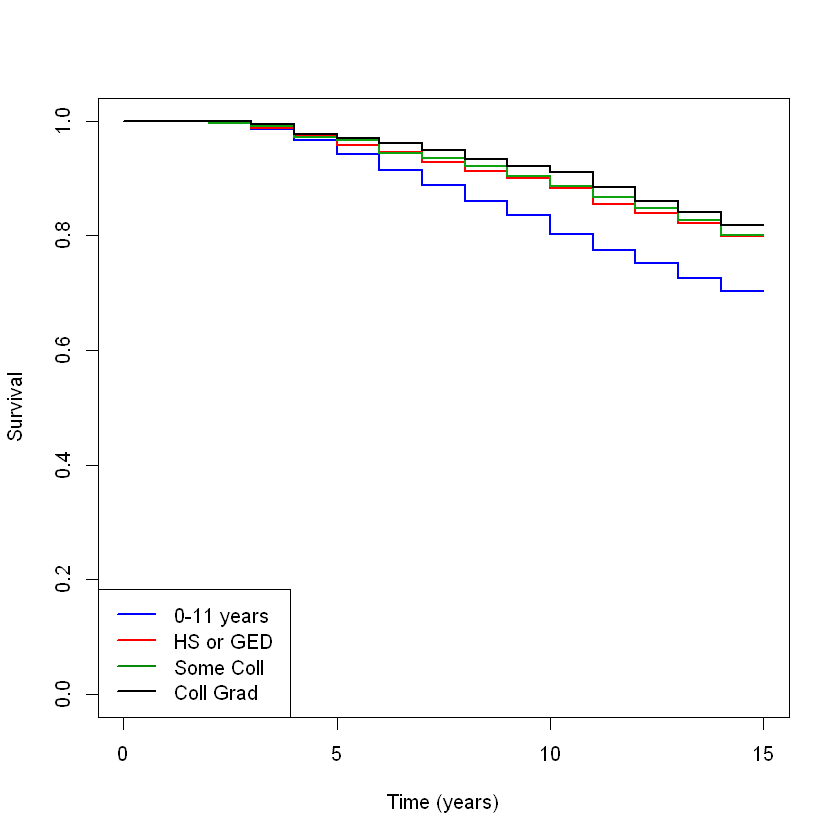

In [32]:
plot(curves, 
xlab = "Time (years)",
ylab='Survival',
col=c('blue','red','#0ea30e','black'),
lwd=2,
conf.int=FALSE) 

legend('bottomleft',
legend=c("0-11 years",'HS or GED','Some Coll','Coll Grad'),
col=c('blue','red','#088808','black'),
lwd=2,bty='y'
)